# 콘텐츠기반 필터링 (Content Based Filtering)

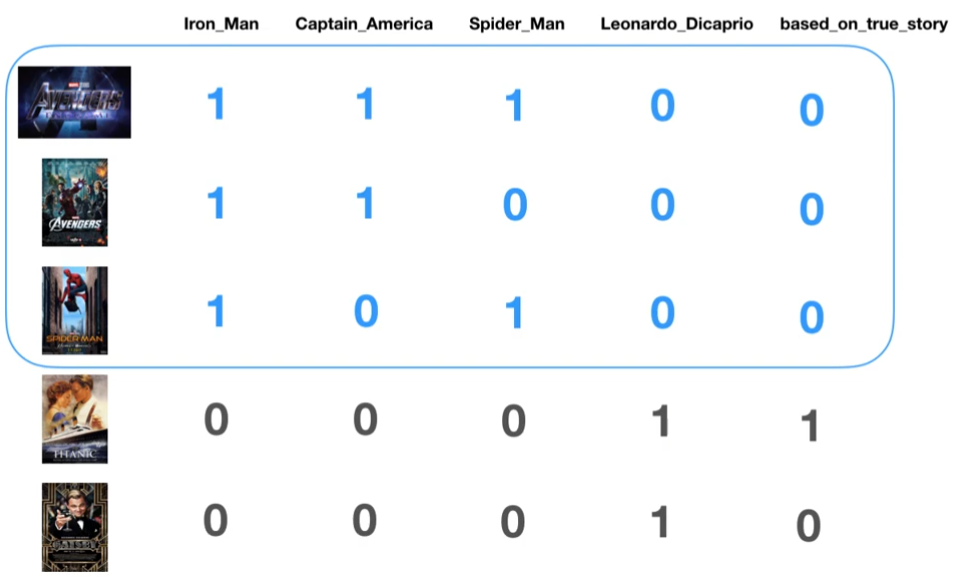

* 영화의 특성을 feature로 만듬
 - 리뷰, 댓글 정보를 통하여

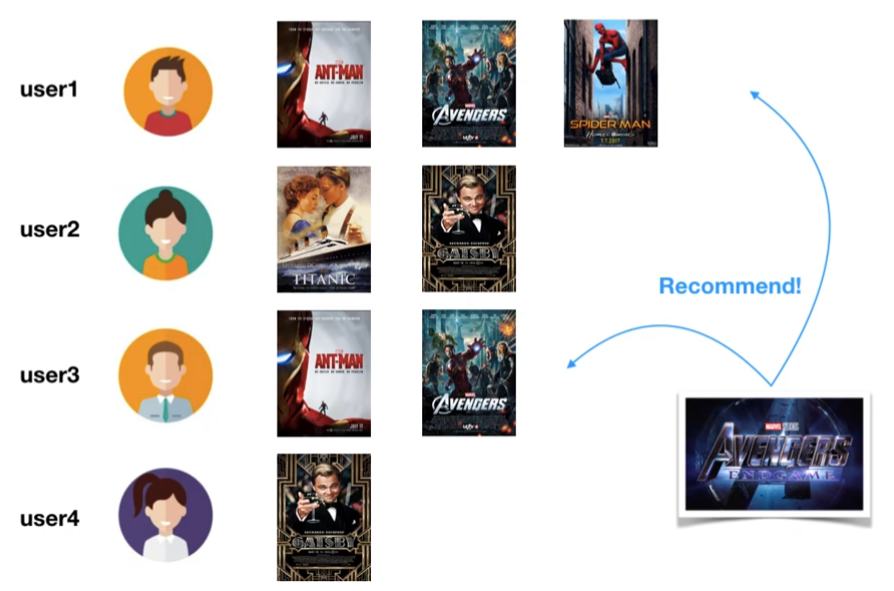

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import codecs
import pickle
import pandas as pd

In [2]:
movie_info_file = 'u.item'
f = open(movie_info_file, 'r',encoding='latin-1')
lines = f.readlines()
movie_title_list=[]
for line in lines:
    movie_title = line.split(sep='|', maxsplit=2)  # 줄 끝의 줄 바꿈 문자를 제거한다.
    movie_title_list.append(movie_title[1])
f.close()

In [3]:
len(movie_title_list)

1682

In [4]:
movie_title_list[:10]

['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Twelve Monkeys (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'Richard III (1995)']

In [5]:
movie_plot_file = 'ml-100k-plot.txt'

f = open(movie_plot_file, 'r',encoding='latin-1')
lines = f.readlines()
movie_plot_list=[]
for line in lines:
    movie_plot = line.split(sep='|', maxsplit=1)  # 줄 끝의 줄 바꿈 문자를 제거한다.
    movie_plot_list.append(movie_plot[1])
f.close()

len(movie_plot_list)

1682

In [6]:
movie_plot_list[:3]

['A little boy named Andy loves to be in his room, playing with his toys, especially his doll named "Woody". But, what do the toys do when Andy is not with them, they come to life. Woody believes that he has life (as a toy) good. However, he must worry about Andy\'s family moving, and what Woody does not know is about Andy\'s birthday party. Woody does not realize that Andy\'s mother gave him an action figure known as Buzz Lightyear, who does not believe that he is a toy, and quickly becomes Andy\'s new favorite toy. Woody, who is now consumed with jealousy, tries to get rid of Buzz. Then, both Woody and Buzz are now lost. They must find a way to get back to Andy before he moves without them, but they will have to pass through a ruthless toy killer, Sid Phillips.\n',
 'When a deadly satellite weapon system falls into the wrong hands, only Agent 007 can save the world from certain disaster. Armed with his license to kill, Bond races to Russia in search of the stolen access codes for "Go

In [7]:
vectorizer = TfidfVectorizer(min_df=2, stop_words=['of','is','this','that','which'])

In [8]:
X = vectorizer.fit_transform(movie_plot_list)
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['000', '007', '10', ..., 'zombies', 'zone', 'zoo'], dtype=object)

In [9]:
movie_sim = cosine_similarity(X)
movie_sim[:3]

array([[1.        , 0.0214585 , 0.05025098, ..., 0.04759486, 0.02297467,
        0.03758619],
       [0.0214585 , 1.        , 0.04526604, ..., 0.04246676, 0.0256056 ,
        0.06447316],
       [0.05025098, 0.04526604, 1.        , ..., 0.04910487, 0.07723813,
        0.10361089]])

In [26]:
def similar_recommend_by_movie_id(movie_id, n_recommand):
      movie_index = movie_id-1
      # enumerate 함수로 [(리스트 인덱스 0, 유사도 0), (리스트 인덱스 1, 유사도 1)...]의
      # 리스트를 만듭니다. 그 후 각 튜플의 두 번째 항목, 즉 유사도를 이용하여 내림차순 정렬합니다.
      # 이렇게 만든 리스트의 가장 앞 튜플의 첫 번째 항목이 영화 ID가 됩니다.
      similar_movies = sorted(list(enumerate(movie_sim[movie_index])),key=lambda x:x[1], reverse=True)
      recommended=1
      print(f"--- '{movie_title_list[movie_id]}' 영화를 보신 분께 추천 드리는 영화 Top {n_recommand} ---\n")
      for movie_info in similar_movies[1:n_recommand]:
            # 주어진 영화와 가장 비슷한 영화는 그 영화 자신이므로 출력 시 제외합니다.
            movie_title= movie_title_list[movie_info[0]]
            print(f'\t추천영화 {recommended}순위: {movie_title}')
            recommended+=1

In [27]:
# similar_recommend_by_movie_id(영화인덱스, 추천건수)
similar_recommend_by_movie_id(0,5)

--- 'Toy Story (1995)' 영화를 보신 분께 추천 드리는 영화 Top 5 ---

	추천영화 1순위: Hollow Reed (1996)
	추천영화 2순위: When Night Is Falling (1995)
	추천영화 3순위: You So Crazy (1994)
	추천영화 4순위: Tin Men (1987)


In [29]:
similar_recommend_by_movie_id(417,5)

--- 'Cinderella (1950)' 영화를 보신 분께 추천 드리는 영화 Top 5 ---

	추천영화 1순위: Heavyweights (1994)
	추천영화 2순위: My Family (1995)
	추천영화 3순위: Grifters, The (1990)
	추천영화 4순위: Jackal, The (1997)
